In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
list_of_name = ["opsahl-ucsocial", "radoslaw_email_email","soc-sign-bitcoinotc","dnc-corecipient", 'email-Eu-core-temporal.txt']

<ipython-input-26-408a258bb22c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("drive/MyDrive/uh/out.opsahl-ucsocial", sep = ' |\t', skiprows=2, names = ['v1', 'v2', 'weight', 'timestamp'])
<ipython-input-26-408a258bb22c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("drive/MyDrive/uh/out.radoslaw_email_email", sep = '  | ', skiprows=2, names = ['v1', 'v2','weight', 'timestamp'])
<ipython-input-26-408a258bb22c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s

In [ ]:
import pandas as pd

df1 = pd.read_csv("drive/MyDrive/uh/out.opsahl-ucsocial", sep = ' |\t', skiprows=2, names = ['v1', 'v2', 'weight', 'timestamp'])
df2 = pd.read_csv("drive/MyDrive/uh/out.radoslaw_email_email", sep = '  | ', skiprows=2, names = ['v1', 'v2','weight', 'timestamp'])
df3 = pd.read_csv("drive/MyDrive/uh/out.soc-sign-bitcoinotc", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'weight', 'timestamp'])
df4 = pd.read_csv("drive/MyDrive/uh/out.dnc-corecipient", sep = ' |\t', skiprows=1, names = ['v1', 'v2', 'timestamp'])
df5 = pd.read_csv('drive/MyDrive/uh/out.email-Eu-core-temporal.txt', sep = ' |\t',  names = ['v1', 'v2', 'timestamp'])

for i in range(len(list_of_name)):
    filename = 'drive/MyDrive/no_graphs_v/' + list_of_name[i] + '.cvc'
    print(filename)
    locals()[f'p{i+1}'] = pd.read_csv(filename)

<ipython-input-3-396f11c61701>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("drive/MyDrive/uh/out.opsahl-ucsocial", sep = ' |\t', skiprows=2, names = ['v1', 'v2', 'weight', 'timestamp'])
<ipython-input-3-396f11c61701>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("drive/MyDrive/uh/out.radoslaw_email_email", sep = '  | ', skiprows=2, names = ['v1', 'v2','weight', 'timestamp'])
<ipython-input-3-396f11c61701>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' 

drive/MyDrive/no_graphs_v/opsahl-ucsocial.cvc
drive/MyDrive/no_graphs_v/radoslaw_email_email.cvc
drive/MyDrive/no_graphs_v/soc-sign-bitcoinotc.cvc
drive/MyDrive/no_graphs_v/dnc-corecipient.cvc
drive/MyDrive/no_graphs_v/email-Eu-core-temporal.txt.cvc


In [ ]:
for d in [df1,df2,df3,df4,df5]:
  print(d.shape[0])

59835
82927
35592
12085
332334


In [ ]:
for p in [p1,p2,p3,p4,p5]:
  print(p.shape[0])

20000
6502
20000
20000
20000


In [ ]:
#edges = sorted(set(zip((df2[['v1','v2']]).min(axis = 1), (df2[['v1','v2']]).max(axis = 1))))

In [ ]:
from collections import defaultdict
def nei(edges):
  neighbours = defaultdict(set)
  for edge in edges:
    if edge[0] != edge[1]:
      neighbours[edge[0]].add(edge[1])
      neighbours[edge[1]].add(edge[0])
  return neighbours


In [ ]:
import math
def static_topological_features_pairs(graph,edge_dist_2):
  CN = []
  AA = []
  JC=[]
  PA=[]
  visited = set()
  for i, row in edge_dist_2.iterrows():
    vert = row['v1']
    node = row['v2']
    # for node in graph[vert]:
    common_neigh = graph[vert] & graph[node]
    CN.append(len(common_neigh))
    AA_ = 0
    for neigh in common_neigh:
      AA_ += 1/math.log(len(graph[neigh]))
    AA.append(AA_)
    JC.append(len(common_neigh) / len(graph[vert].union(graph[node])))
    PA.append(len(graph[vert]) * len(graph[node]))
  return CN,AA,JC,PA

In [ ]:
df1

,v1,v2,weight,timestamp
0,1,2,1,1082008561
1,3,4,1,1082123439
2,5,2,1,1082381991
3,6,7,1,1082407219
4,8,7,1,1082407356
...,...,...,...,...
59830,1899,1847,1,1098744248
59831,1899,1097,1,1098744436
59832,1899,277,1,1098744603
59833,1878,1624,1,1098744711


In [ ]:
for pair in [(df1,p1), (df2,p2), (df3,p3), (df4, p4), (df5, p5)]:
  edges = sorted(set(zip((pair[0][['v1','v2']]).min(axis = 1), (pair[0][['v1','v2']]).max(axis = 1))))
  neighbours = nei(edges)
  pair[1]['CN'],pair[1]['AA'],pair[1]['JC'],pair[1]['PA'] = static_topological_features_pairs(neighbours,pair[1])

In [ ]:
p3

,Unnamed: 0,v1,v2,weight,timestamp,result,features,CN,AA,JC,PA
0,0,1,3,2.0,1.289242e+09,0,"[0.40000014500113346, 1.4500113343363097e-07, ...",2,0.361941,0.035714,165
1,1,8,9,8.0,1.289254e+09,0,"[0.40012009280523403, 0.0, 0.20006004640261701...",0,0.000000,0.000000,215
2,2,10,1,7.0,1.289556e+09,0,"[0.4000602718806042, 6.02718806042013e-05, 0.2...",3,0.617410,0.049180,495
3,3,10,12,8.0,1.289556e+09,0,"[0.4006861205503379, 0.0005655767891294683, 0....",4,1.669910,0.121212,252
4,4,10,2,7.0,1.289556e+09,0,"[0.4000602718806042, 6.02718806042013e-05, 0.2...",6,1.459405,0.107143,477
...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,5881,4428,NaN,NaN,1,"[1.6026578665137738, 0.3800425901074309, 0.611...",1,0.149738,0.033333,30
19996,19996,5881,2529,NaN,NaN,1,"[1.4756176058297, 0.507082850791505, 0.4842673...",1,0.149738,0.011494,87
19997,19997,5881,2901,NaN,NaN,1,"[1.5003308173180194, 0.4823696393031853, 0.508...",1,0.149738,1.000000,1
19998,19998,5881,1243,NaN,NaN,1,"[1.2901543280229724, 0.6925461285982324, 0.298...",1,0.149738,0.500000,2


In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
import ast

In [ ]:
for df in [p1,p2,p3,p4,p5]:
  for i in range(df.shape[0]):
    df['features'][i] = ast.literal_eval(df.features[i])

<ipython-input-14-8509933dbdb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'][i] = ast.literal_eval(df.features[i])


In [ ]:
for df in [p1,p2,p3,p4,p5]:
  df[["f0","f1","f2","f3","f4","f5","f6","f7","f8","f9","f10","f11","f12","f13","f14","f15","f16","f17","f18","f19","f20","f21","f22","f23","f24","f25","f26","f27","f28","f29","f30","f31","f32","f33","f34","f35","f36","f37","f38","f39","f40","f41","f42","f43","f44","f45","f46","f47","f48","f49","f50","f51","f52","f53","f54","f55","f56","f57","f58","f59","f60","f61","f62","f63","f64","f65","f66","f67","f68","f69","f70","f71","f72","f73","f74","f75","f76","f77","f78","f79","f80","f81","f82","f83"]] = pd.DataFrame(df.features.tolist(), index= df.index)

In [ ]:
for df in [p1,p2,p3,p4,p5]:
  df.drop(columns = ['timestamp', 'features'], axis = 1, inplace = True)
  try:
    df.drop(columns = ['weight'], axis = 1, inplace = True)
  except(Exception):
    continue

In [ ]:
for df in [p1,p2,p3,p4,p5]:
  try:
    df.drop(columns = ['features'], axis = 1, inplace = True)
  except(Exception):
    continue

In [ ]:
p1[p1['result'] == 0].CN.describe()


count    10000.00000
mean         4.02660
std          5.20098
min          0.00000
25%          1.00000
50%          3.00000
75%          5.00000
max         74.00000
Name: CN, dtype: float64

In [ ]:
for p in [p1,p2,p3,p4,p5]:
  print("Принадлежит")
  print(p[p['result'] == 0].CN.describe())
  print("Не принадлежит")
  print(p[p['result'] == 1].CN.describe())


Принадлежит
count    10000.00000
mean         4.02660
std          5.20098
min          0.00000
25%          1.00000
50%          3.00000
75%          5.00000
max         74.00000
Name: CN, dtype: float64
Не принадлежит
count    10000.000000
mean         2.005300
std          2.324008
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         63.000000
Name: CN, dtype: float64
Принадлежит
count    3251.000000
mean       39.138111
std        16.142662
min         0.000000
25%        31.000000
50%        38.000000
75%        46.000000
max       135.000000
Name: CN, dtype: float64
Не принадлежит
count    3251.00000
mean       11.70809
std         9.94115
min         1.00000
25%         3.00000
50%        10.00000
75%        17.00000
max        56.00000
Name: CN, dtype: float64
Принадлежит
count    10000.000000
mean         4.780900
std          8.299119
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max     

In [ ]:
p4

,Unnamed: 0,v1,v2,result,CN,AA,JC,PA,f0,f1,...,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83
0,0,1,1699,0,2,1.391138,0.333333,15,0.400000,0.000000,...,0.200000,0.200000,3.600000,1.200000,1.200000,2.400000,0.400000,5.551115e-17,0.200000,0.200000
1,1,737,1278,0,75,16.703325,0.474684,11932,0.400000,0.000000,...,0.289950,0.410952,118.356597,57.083018,30.636790,87.719808,0.443878,4.076208e-02,0.201558,0.242320
2,2,737,1936,0,73,16.125793,0.948052,5624,0.400000,0.000000,...,0.200000,0.289950,60.236790,1.036790,29.600000,30.636790,0.401558,1.557827e-03,0.200000,0.201558
3,3,903,339,0,74,16.366766,0.948718,5775,0.400000,0.000000,...,0.200000,0.275258,63.225202,3.225202,30.000000,33.225202,0.402593,2.592695e-03,0.200000,0.202593
4,4,903,852,0,76,17.006940,0.531469,10934,0.400000,0.000000,...,0.275258,0.463786,129.321376,62.870972,33.225202,96.096174,0.466593,6.140778e-02,0.202593,0.264000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2029,1649,1,1,0.174125,0.045455,22,0.402023,0.002023,...,0.200000,0.240227,10.969984,10.169984,0.400000,10.569984,0.440227,4.022692e-02,0.200000,0.240227
19996,19996,2029,1826,1,1,0.174125,1.000000,1,0.409102,0.009102,...,0.200000,0.285334,0.970668,0.170668,0.400000,0.570668,0.485334,8.533418e-02,0.200000,0.285334
19997,19997,2029,1969,1,1,0.174125,1.000000,1,0.439444,0.039444,...,0.200000,0.377637,1.155275,0.355275,0.400000,0.755275,0.577637,1.776373e-01,0.200000,0.377637
19998,19998,2029,1976,1,1,0.174125,0.011628,86,0.400000,0.000000,...,0.200000,0.370668,56.530938,55.730938,0.400000,56.130938,0.508412,1.084117e-01,0.200000,0.308412


In [ ]:
p4

,Unnamed: 0,v1,v2,result,CN,AA,JC,PA,f0,f1,...,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83
0,0,1,1699,0,2,1.391138,0.333333,15,0.400000,0.000000,...,0.200000,0.200000,3.600000,1.200000,1.200000,2.400000,0.400000,5.551115e-17,0.200000,0.200000
1,1,737,1278,0,75,16.703325,0.474684,11932,0.400000,0.000000,...,0.289950,0.410952,118.356597,57.083018,30.636790,87.719808,0.443878,4.076208e-02,0.201558,0.242320
2,2,737,1936,0,73,16.125793,0.948052,5624,0.400000,0.000000,...,0.200000,0.289950,60.236790,1.036790,29.600000,30.636790,0.401558,1.557827e-03,0.200000,0.201558
3,3,903,339,0,74,16.366766,0.948718,5775,0.400000,0.000000,...,0.200000,0.275258,63.225202,3.225202,30.000000,33.225202,0.402593,2.592695e-03,0.200000,0.202593
4,4,903,852,0,76,17.006940,0.531469,10934,0.400000,0.000000,...,0.275258,0.463786,129.321376,62.870972,33.225202,96.096174,0.466593,6.140778e-02,0.202593,0.264000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2029,1649,1,1,0.174125,0.045455,22,0.402023,0.002023,...,0.200000,0.240227,10.969984,10.169984,0.400000,10.569984,0.440227,4.022692e-02,0.200000,0.240227
19996,19996,2029,1826,1,1,0.174125,1.000000,1,0.409102,0.009102,...,0.200000,0.285334,0.970668,0.170668,0.400000,0.570668,0.485334,8.533418e-02,0.200000,0.285334
19997,19997,2029,1969,1,1,0.174125,1.000000,1,0.439444,0.039444,...,0.200000,0.377637,1.155275,0.355275,0.400000,0.755275,0.577637,1.776373e-01,0.200000,0.377637
19998,19998,2029,1976,1,1,0.174125,0.011628,86,0.400000,0.000000,...,0.200000,0.370668,56.530938,55.730938,0.400000,56.130938,0.508412,1.084117e-01,0.200000,0.308412


In [ ]:
p1.columns

Index(['Unnamed: 0', 'v1', 'v2', 'result', 'CN', 'AA', 'JC', 'PA', 'f0', 'f1',
       'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22',
       'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32',
       'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
       'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52',
       'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62',
       'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72',
       'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82',
       'f83'],
      dtype='object')

In [ ]:
cols=[ 'CN', 'AA', 'JC', 'PA', 'f0', 'f1',
       'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12',
       'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22',
       'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32',
       'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42',
       'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52',
       'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62',
       'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72',
       'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82',
       'f83'] 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
for p in [p1,p2,p3,p4,p5]:
  X=p[cols]
  y=p['result']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  res = logreg.predict_proba(X_test)
  print("ROCAUC")
  print(metrics.roc_auc_score(y_test, res[:,1]))
  print

0.8887081111111111
0.9540153425809162
0.9161591111111111
0.9853147777777778
0.9670284444444444


In [ ]:
pd.set_option('display.max_rows', 200)

In [ ]:
p4[cols + ['result']].corr()['result'].to_numpy().reshape((-1, 1))

array([[-0.73103812],
       [-0.73962486],
       [-0.44623555],
       [-0.54196442],
       [ 0.15332892],
       [ 0.15711976],
       [ 0.03813448],
       [ 0.15752576],
       [-0.01877275],
       [ 0.1003283 ],
       [-0.17207805],
       [ 0.03441667],
       [-0.20465691],
       [ 0.08128847],
       [-0.34405355],
       [-0.10208582],
       [-0.37588849],
       [ 0.03949248],
       [-0.444927  ],
       [-0.25669136],
       [-0.33622651],
       [-0.2316661 ],
       [-0.40701013],
       [-0.29025883],
       [-0.57434137],
       [-0.15146195],
       [-0.64208645],
       [-0.43664255],
       [-0.37697982],
       [ 0.0049284 ],
       [-0.43808641],
       [-0.27082786],
       [ 0.15086482],
       [ 0.15446109],
       [ 0.03710364],
       [ 0.15485165],
       [-0.01740926],
       [ 0.09848894],
       [-0.17084622],
       [ 0.0345611 ],
       [-0.20227453],
       [ 0.07727   ],
       [-0.34158215],
       [-0.1013888 ],
       [-0.37271818],
       [ 0

<Axes: >

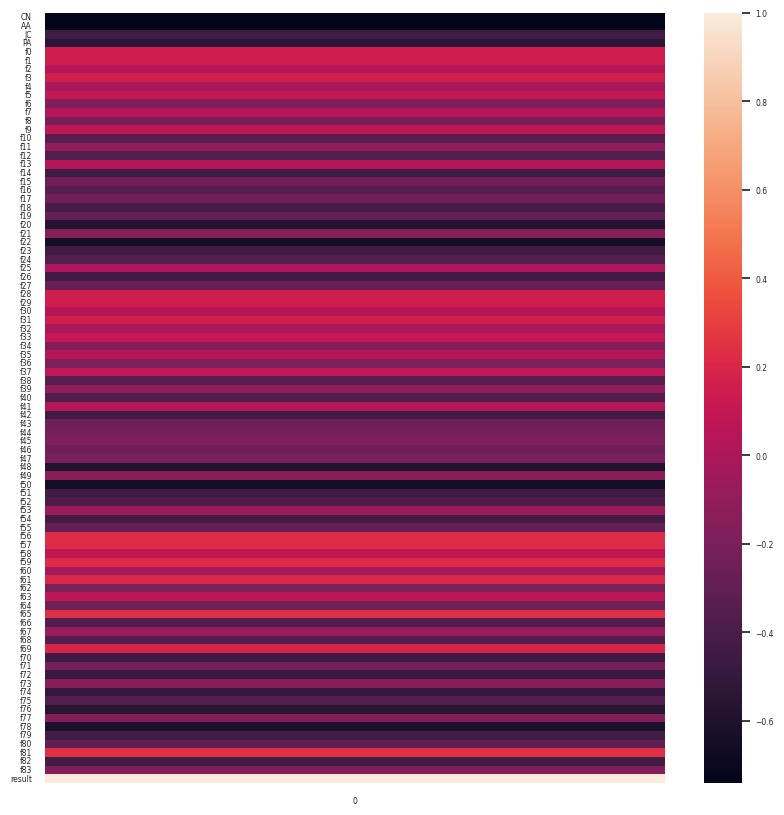

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1000
fig, ax = plt.subplots(figsize=(10,10))  
sns.set(font_scale=0.5)   
sns.heatmap(p4[cols + ['result']].corr()['result'].to_numpy().reshape((-1, 1)), yticklabels=p4[cols + ['result']].corr()['result'].index, ax=ax)


In [ ]:
# p1.to_csv('/content/drive/MyDrive/graph_datasets_final/opsahl-ucsocial_p1', index = False)
# p2.to_csv('/content/drive/MyDrive/graph_datasets_final/radoslaw_email_email_p2', index = False)
# p3.to_csv('/content/drive/MyDrive/graph_datasets_final/soc-sign-bitcoinotc_p3', index = False)
# p4.to_csv('/content/drive/MyDrive/graph_datasets_final/dnc-corecipient_p4', index = False)
# p5.to_csv('/content/drive/MyDrive/graph_datasets_final/email-Eu-core-temporal_p5', index = False)

In [ ]:
list_of_name = ["opsahl-ucsocial_p1", "radoslaw_email_email_p2","soc-sign-bitcoinotc_p3","dnc-corecipient_p4", 'email-Eu-core-temporal_p5']

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

for i in range(len(list_of_name)):
    filename = '/content/drive/MyDrive/graph_datasets_final/' + list_of_name[i]
    print(filename)
    locals()[f'p{i+1}'] = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/graph_datasets_final/opsahl-ucsocial_p1
/content/drive/MyDrive/graph_datasets_final/radoslaw_email_email_p2
/content/drive/MyDrive/graph_datasets_final/soc-sign-bitcoinotc_p3
/content/drive/MyDrive/graph_datasets_final/dnc-corecipient_p4
/content/drive/MyDrive/graph_datasets_final/email-Eu-core-temporal_p5


,Unnamed: 0.1,Unnamed: 0,v1,v2,result,CN,AA,JC,PA,f0,...,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83
0,0,0,1,2,0,1,0.192984,0.025641,175,0.400000,...,0.980519,0.997347,509.562857,480.821061,14.370898,495.191959,1.387929,0.081484,0.653223,0.734706
1,1,1,3,4,0,0,0.000000,0.000000,178,0.410982,...,0.266280,0.993412,652.339595,651.274476,0.532559,651.807036,0.964146,0.431587,0.266280,0.697866
2,2,2,9,14,0,0,0.000000,0.000000,723,0.438252,...,0.346091,0.989558,1473.864516,1468.536568,2.663974,1471.200542,0.903672,0.237678,0.332997,0.570675
3,3,3,9,14,0,0,0.000000,0.000000,723,0.438252,...,0.346091,0.989558,1473.864516,1468.536568,2.663974,1471.200542,0.903672,0.237678,0.332997,0.570675
4,4,4,9,24,0,0,0.000000,0.000000,241,0.438677,...,0.325166,0.989558,1471.850874,1470.550210,0.650332,1471.200542,0.895841,0.245509,0.325166,0.570675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19995,1891,308,1,1,0.261189,0.009434,106,1.193693,...,0.890068,0.972459,507.371606,503.481770,1.944918,505.426688,1.472881,0.472037,0.500422,0.972459
19996,19996,19996,1894,697,1,1,0.345976,0.011628,86,1.242147,...,0.987259,0.991471,417.263221,409.372293,3.945464,413.317757,1.599597,0.373135,0.613231,0.986366
19997,19997,19997,1899,395,1,2,0.521716,0.068966,130,1.254812,...,0.765053,0.999997,64.045271,39.945921,12.049675,51.995596,1.501985,0.497846,0.502070,0.999915
19998,19998,19998,1899,369,1,1,0.221687,0.038462,26,1.252431,...,0.405458,0.999997,52.806511,51.184680,0.810916,51.995596,1.405373,0.594457,0.405458,0.999915


In [ ]:
#p1.corr()['result']

In [ ]:
res[:,0]

array([0.28083371, 0.97399334, 0.34015447, ..., 0.13114908, 0.26571265,
       0.86188274])

In [ ]:
X

,v1,v2,result,CN,AA,JC,PA,f0,f1,f2,...,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83
0,569,862,0,35,8.823728,0.289256,5963,0.400550,0.000005,0.200272,...,0.999204,0.999396,4558.194627,124.847883,2216.673372,2341.521255,1.120178,0.196136,0.462021,0.658157
1,947,774,0,3,0.740513,0.075000,306,0.400587,0.000000,0.200294,...,0.998310,0.998712,13555.062812,319.695087,6617.683863,6937.378950,1.314410,0.001756,0.656327,0.658083
2,569,862,0,35,8.823728,0.289256,5963,0.400550,0.000005,0.200272,...,0.999204,0.999396,4558.194627,124.847883,2216.673372,2341.521255,1.120178,0.196136,0.462021,0.658157
3,569,862,0,35,8.823728,0.289256,5963,0.400550,0.000005,0.200272,...,0.999204,0.999396,4558.194627,124.847883,2216.673372,2341.521255,1.120178,0.196136,0.462021,0.658157
4,692,769,0,44,11.328036,0.258824,10360,0.400708,0.000060,0.200324,...,0.999218,0.999429,4022.894330,3186.594385,418.149973,3604.744357,1.184115,0.074964,0.554576,0.629540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1004,319,1,1,0.236177,0.010989,1860,0.401789,0.000965,0.200412,...,0.998795,0.998841,2313.793519,684.948064,814.422728,1499.370792,1.277616,0.006963,0.635327,0.642289
19996,1004,565,1,1,0.206099,0.009009,3100,0.400663,0.000161,0.200251,...,0.998841,0.999887,2537.020735,461.720848,1037.649944,1499.370792,1.243562,0.027091,0.608236,0.635327
19997,1004,150,1,3,0.630216,0.028846,2790,0.401708,0.000884,0.200412,...,0.998841,0.999299,1895.941443,1102.800140,396.570651,1499.370792,1.283318,0.012665,0.635327,0.647991
19998,1004,579,1,1,0.310667,0.016129,62,0.829183,0.428360,0.200412,...,0.785677,0.998841,1500.942145,1497.799438,1.571354,1499.370792,1.421004,0.150350,0.635327,0.785677


In [ ]:
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

corr = p1.corr()
sns.heatmap(corr, 
        xticklabels=X.columns,
        yticklabels=y)

ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7fb0cfcbd7e0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fb0cfcbca60> (for post_execute):


KeyboardInterrupt: ignored